# Лабороторная работа №3

Задания 12.4(з) и 12.5(в)

In [37]:
# Резльутаты лабы. Сначала нужно выполнить все ячейки ниже
print("#Task 1:")
PrintResultForTask1()
print("\n#Task 2:")
PrintResultForTask2()

#Task 1:
Root of equation in [0; 0.5]: x_0 =  0.7275144767582377
function value: f(x_0)=  4.440892098500626e-16

#Task 2:
Roots of equation are:
X=[3.35591174 1.20690682]

function value:
f(X)=[1.74349111 0.77266807]



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

### Задание 12.4(з):
Отделить корни следующих уравнений, а затем уточнить один
из них с помощью подходящего итерационно процесса

з) $2\lg(x) - \dfrac{x}{2} + 1 = 0$

In [8]:
EPS = 1e-15

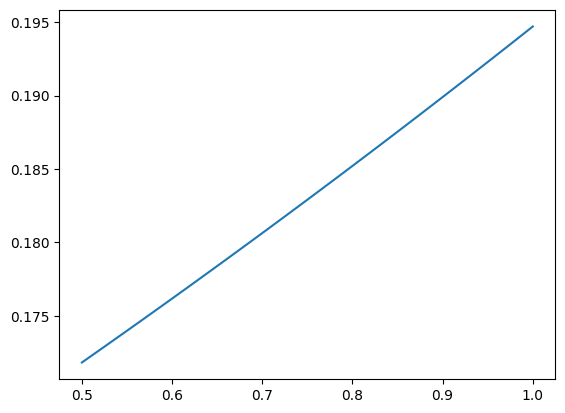

In [9]:
# f(x) = 0
f = lambda x: 2 * np.log (x) - x / 2 + 1

# F(x) = x
F = lambda x: np.exp ((x / 2 - 1) / 2)

# F'(x)
F_der = lambda x: np.exp ((x / 2 - 1) / 2) / 4

# Корень на интервале [0.5, 1]. Проверим на этом же интервале значение производной:
interval = np.linspace(0.5, 1, 100)
derivative_values = F_der(inetrval)
plt.plot(interval, derivative_values)



Значение производной меньше 1 на интервале --> метод сходится

Найдем корень, начнем с точки 0.75


In [17]:
def GetRootMSI (eps = EPS):
    x_prev = 10
    x = 0.75
    while np.abs (x - x_prev) >= eps:
        x_prev = x
        x = F (x_prev)
    
    return x

In [20]:
def PrintResultForTask1():
    x = GetRootMSI()
    print ("Root of equation in [0; 0.5]: x_0 = ", x)
    print ("function value: f(x_0)= ", f(x))


### Задание 12.5(в)

в) $  \begin{cases}  cos (x - 1) + y = 0.5 \\ x - cos y = 3  \end{cases} $

Примерное значение корня x = 3, y = 1

In [23]:
EPS = 1e-3

In [25]:
# F(x):
F2 = lambda x: np.array ([np.cos (x[0] - 1) + x[1] - 0.5, x[0] - np.cos (x[1]) - 3])

# F'(x):

def F2_der(x):
    res = np.zeros ((2, 2))

    res[0, 0] = -np.sin (x[0] - 1)
    res[0, 1] = 1
    res[1, 0] = 1
    res[1, 1] = np.sin (x[1])

    return res

In [30]:

def GetRootNewton(eps = EPS):
    x_prev = np.array ([10.0, 10.0])
    x = np.array ([3, 1])

    while np.linalg.norm (x - x_prev) >= eps:
        x_prev = x
        x = x_prev - np.matmul (np.linalg.inv (F2_der(x)), F2(x)) 
    
    return x

In [31]:
def PrintResultForTask2():
    X = GetRootNewton()

    print (f"Roots of equation are:\nX={X}\n")
    print (f"function value:\nf(X)={f(X)}\n", )
